# Customer Loyalty using XGBoost 
This project will be looking at a data set from Kaggle of customer shopping behavior to build a regrossor model. By exploring this data set and building a simple model as a test piece to see the potential value in predicting shopper behavior and what can keep them comming back. 

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/LadyKate7390/Kate_G_DS_Portfolio/refs/heads/main/CustomerPerso/Customer%20Purchasing%20Behaviors.csv')

In [5]:
df.columns

Index(['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'region', 'purchase_frequency'],
      dtype='object')

In [6]:
df.isnull().sum()  # Checking for missing values

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [7]:
df.describe()  #descibing the data 

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


# The data
    the data has 7 features all being intigers. 
## EDA to explore 

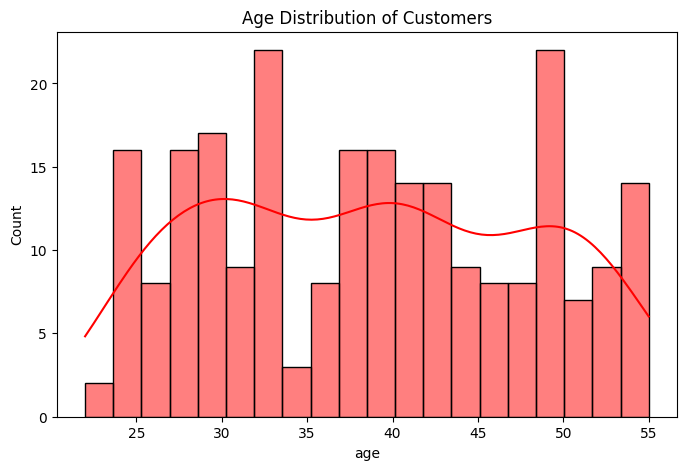

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='red')
plt.title('Age Distribution of Customers')
plt.show()

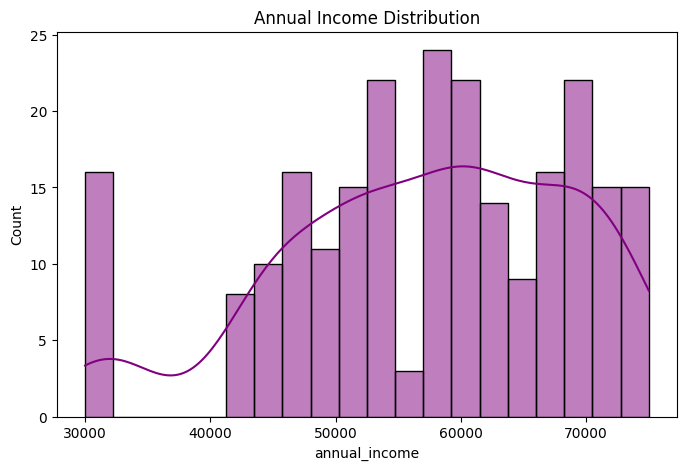

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['annual_income'], bins=20, kde=True, color='purple')
plt.title('Annual Income Distribution')
plt.show()

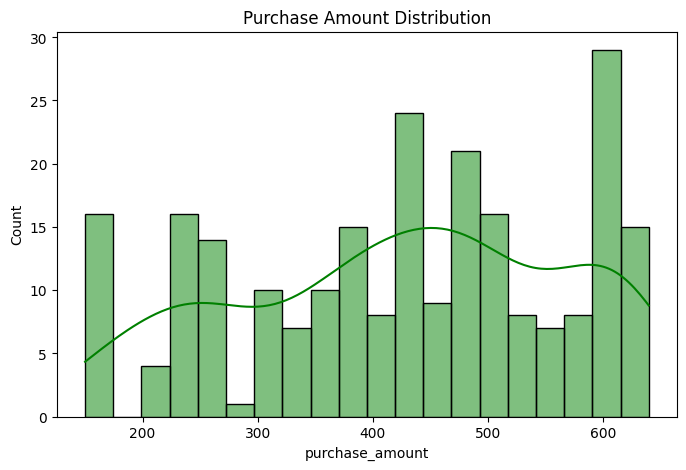

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['purchase_amount'], bins=20, kde=True, color='green')
plt.title('Purchase Amount Distribution')
plt.show()

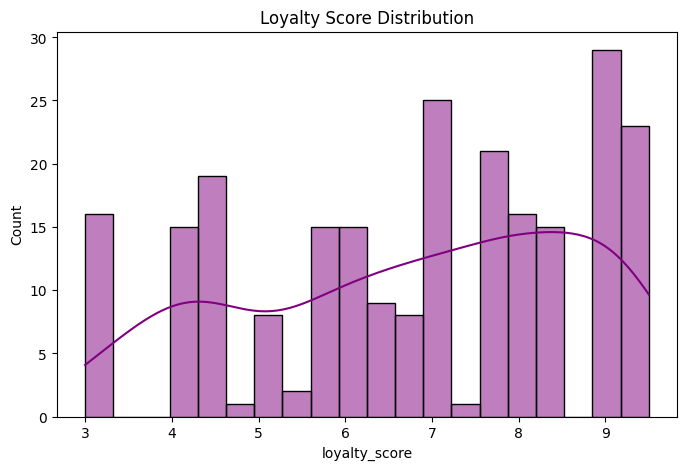

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['loyalty_score'], bins=20, kde=True, color='purple')
plt.title('Loyalty Score Distribution')
plt.show()

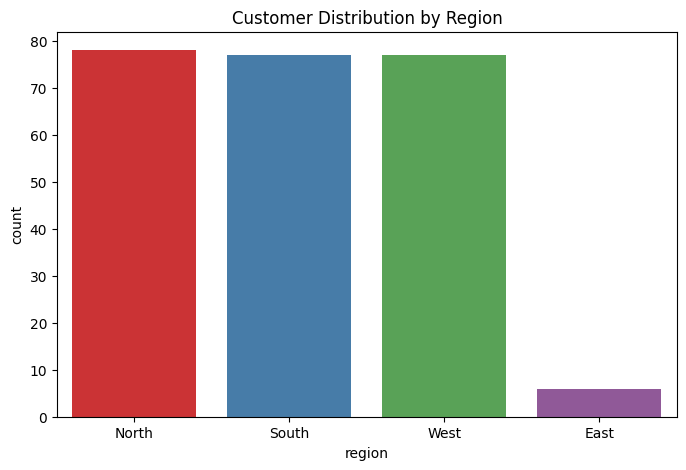

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='region', data=df, palette='Set1', hue = 'region')
plt.title('Customer Distribution by Region')
plt.show()

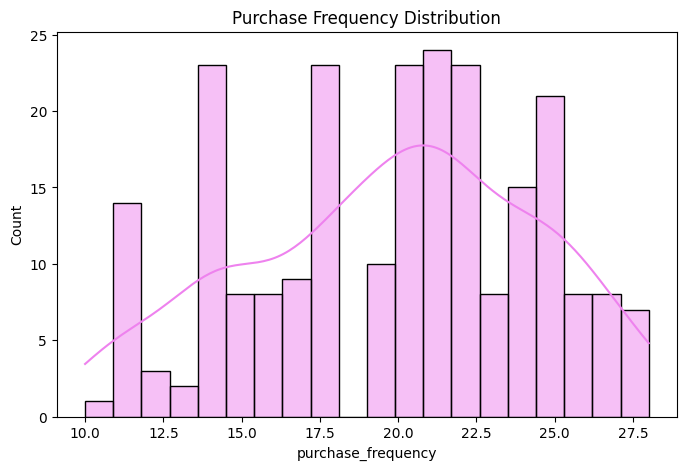

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['purchase_frequency'], bins=20, kde=True, color='violet')
plt.title('Purchase Frequency Distribution')
plt.show()

In [19]:
#dropping non numeric data 
df_numeric = df.drop(columns=['region', 'user_id']) 

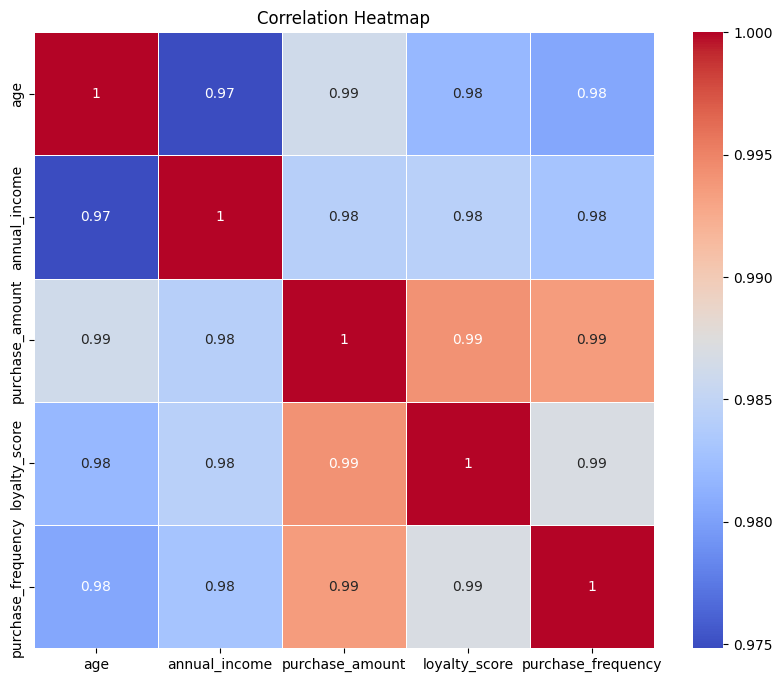

In [20]:
plt.figure(figsize=(10,8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

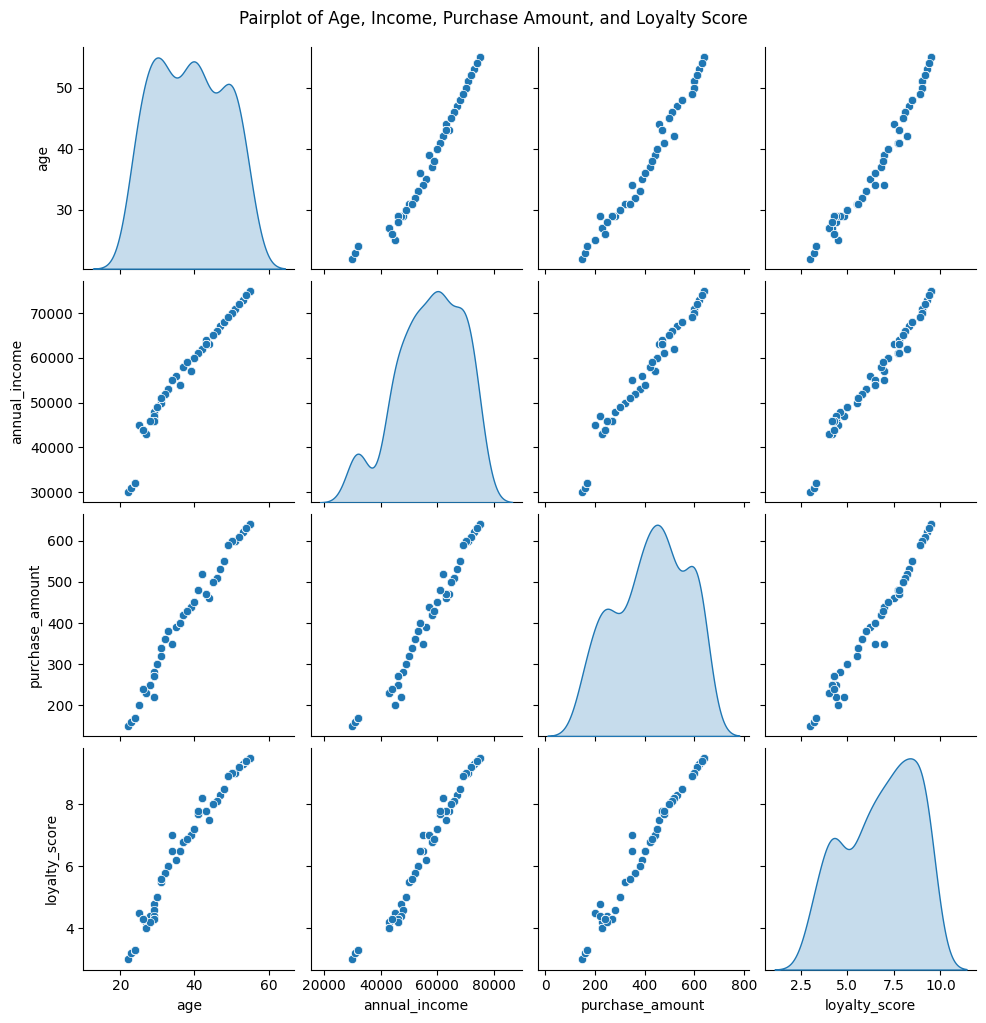

In [21]:
sns.pairplot(df[['age', 'annual_income', 'purchase_amount', 'loyalty_score']], diag_kind='kde')
plt.suptitle('Pairplot of Age, Income, Purchase Amount, and Loyalty Score', y=1.02)
plt.show()

In [22]:
# Feature Scaling
X = df_numeric.drop(columns=['loyalty_score'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
#feature and target variable
X = df_numeric.drop(columns=[ 'loyalty_score'])  
y = df['loyalty_score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Initializing the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)


# Defining the hyperparameters and their values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [25]:
#setting up the gridsearch
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

#fitting the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [26]:
# Getting the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Training the model with the best hyperparameters
best_xgb_regressor = grid_search.best_estimator_

# Making predictions
y_pred = best_xgb_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"XGBoost Regressor with Tuning - MSE: {mse}, R2 Score: {r2}")

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
XGBoost Regressor with Tuning - MSE: 0.006741698312983527, R2 Score: 0.9983676153280323
